In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import sklearn
print(sklearn.__version__)


1.7.1


In [4]:
import xgboost as xgb
from xgboost import XGBClassifier

print("XGBoost version:", xgb.__version__)



XGBoost version: 3.0.4


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import joblib

In [6]:
pd.set_option("display.max_columns", 100)

In [7]:

BALLS_PATH   = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\ball_by_ball_data.csv"
MATCHES_PATH = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\ipl_matches_data.csv"
PLAYERS_PATH = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\players-data-updated.csv"
TEAMS_PATH   = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\teams_data.csv"

balls   = pd.read_csv(BALLS_PATH)
matches = pd.read_csv(MATCHES_PATH)

print("Balls shape:", balls.shape)
print("Matches shape:", matches.shape)
print("\nBalls columns:\n", balls.columns.tolist())
print("\nMatches columns:\n", matches.columns.tolist())


Balls shape: (278205, 30)
Matches shape: (1169, 24)

Balls columns:
 ['season_id', 'match_id', 'batter', 'bowler', 'non_striker', 'team_batting', 'team_bowling', 'over_number', 'ball_number', 'batter_runs', 'extras', 'total_runs', 'batsman_type', 'bowler_type', 'player_out', 'fielders_involved', 'is_wicket', 'is_wide_ball', 'is_no_ball', 'is_leg_bye', 'is_bye', 'is_penalty', 'wide_ball_runs', 'no_ball_runs', 'leg_bye_runs', 'bye_runs', 'penalty_runs', 'wicket_kind', 'is_super_over', 'innings']

Matches columns:
 ['match_id', 'season_id', 'balls_per_over', 'city', 'match_date', 'event_name', 'match_number', 'gender', 'match_type', 'format', 'overs', 'season', 'team_type', 'venue', 'toss_winner', 'team1', 'team2', 'toss_decision', 'match_winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'result', 'stage']


In [8]:
# If "season" already exists in balls, drop it
if "season" in balls.columns:
    balls = balls.drop(columns=["season"])

# Now safely merge
balls = balls.merge(
    matches[["match_id", "season"]],
    on="match_id",
    how="left"
)


In [55]:
import pandas as pd

# -------------------------------
# 📌 Load Your Data
# -------------------------------
BALLS_PATH   = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\ball_by_ball_data.csv"
MATCHES_PATH = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\ipl_matches_data.csv"

balls = pd.read_csv(BALLS_PATH)
matches = pd.read_csv(MATCHES_PATH)

# -------------------------------
# 📌 Fix Column Names if needed
# -------------------------------
# Rename match_id if needed
if "match_id" not in matches.columns and "id" in matches.columns:
    matches.rename(columns={"id": "match_id"}, inplace=True)

if "match_id" not in balls.columns and "id" in balls.columns:
    balls.rename(columns={"id": "match_id"}, inplace=True)

# Rename batsman_runs if needed
if "batter_runs" not in balls.columns and "batsman_runs" in balls.columns:
    balls.rename(columns={"batsman_runs": "batter_runs"}, inplace=True)

# Rename batsman if needed
if "batter" not in balls.columns and "batsman" in balls.columns:
    balls.rename(columns={"batsman": "batter"}, inplace=True)

# -------------------------------
# 📌 Merge Season into Balls Data
# -------------------------------
balls = balls.merge(matches[["match_id", "season"]], on="match_id", how="left")

# -------------------------------
# 📌 Season-wise Analysis
# -------------------------------

# 1. Total Matches per Season
total_matches = (
    matches.groupby("season")["match_id"]
    .nunique()
    .reset_index(name="matches")
)

# 2. Total Sixes per Season
total_sixes = (
    balls.query("batter_runs == 6")
    .groupby("season")["batter_runs"]
    .count()
    .reset_index(name="sixes")
)

# 3. Total Fours per Season
total_fours = (
    balls.query("batter_runs == 4")
    .groupby("season")["batter_runs"]
    .count()
    .reset_index(name="fours")
)

# 4. Centuries & Half Centuries
runs_per_innings = (
    balls.groupby(["season", "match_id", "batter"])["batter_runs"]
    .sum()
    .reset_index()
)

centuries = (
    runs_per_innings.query("batter_runs >= 100")
    .groupby("season")["batter"]
    .count()
    .reset_index(name="centuries")
)

half_centuries = (
    runs_per_innings.query("50 <= batter_runs < 100")
    .groupby("season")["batter"]
    .count()
    .reset_index(name="half_centuries")
)

# 5. Teams Played per Season
teams_played = (
    matches.melt(id_vars=["season"], value_vars=["team1", "team2"])
    .groupby("season")["value"]
    .nunique()
    .reset_index(name="teams_played")
)

# 6. Venues per Season
venues = (
    matches.groupby("season")["venue"]
    .nunique()
    .reset_index(name="venues")
)

# -------------------------------
# 📌 Merge Everything
# -------------------------------
season_summary = (
    total_matches.merge(total_sixes, on="season", how="left")
    .merge(total_fours, on="season", how="left")
    .merge(centuries, on="season", how="left")
    .merge(half_centuries, on="season", how="left")
    .merge(teams_played, on="season", how="left")
    .merge(venues, on="season", how="left")
)

# -------------------------------
# ✅ Show Table
# -------------------------------
print("📊 IPL Season-wise Summary")
display(season_summary)


📊 IPL Season-wise Summary


,season,matches,sixes,fours,centuries,half_centuries,teams_played,venues
0,2008,58,623,1703,6,83,8,9
1,2009,57,508,1321,2,70,8,8
2,2010,60,587,1709,4,88,8,13
3,2011,73,639,1916,6,89,10,12
4,2012,74,733,1911,6,96,9,12
5,2013,76,681,2054,4,99,9,13
6,2014,60,715,1563,3,91,8,13
7,2015,59,692,1611,4,89,8,13
8,2016,60,639,1633,7,110,8,11
9,2017,59,706,1612,5,95,8,11


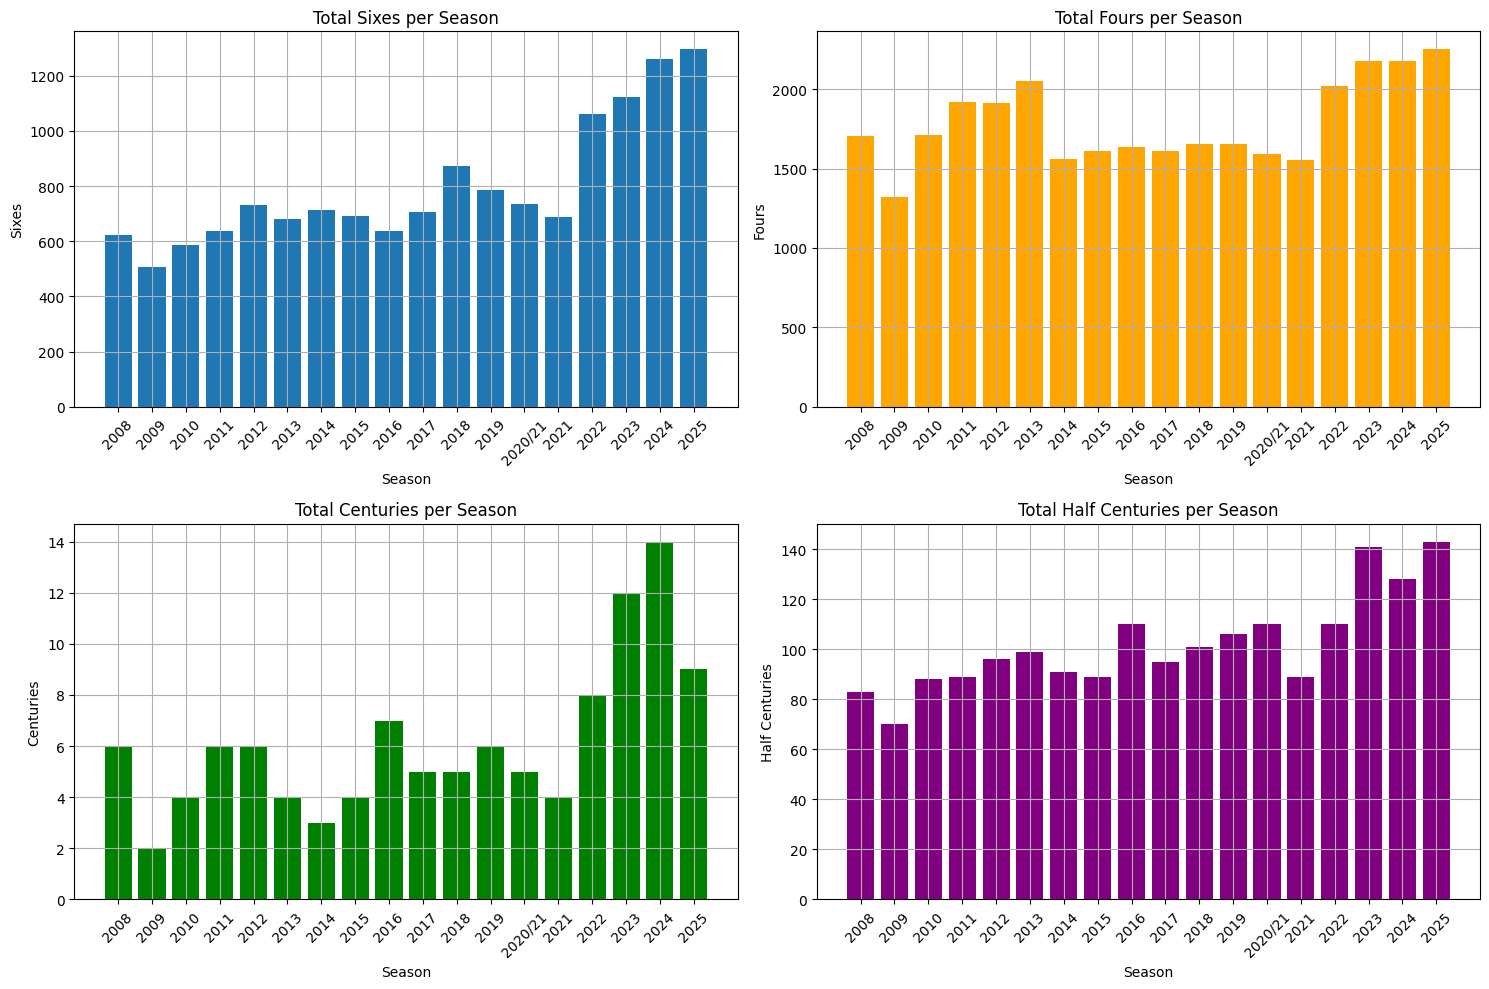

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))

# Sixes
axes[0,0].bar(total_sixes["season"], total_sixes["6's"])
axes[0,0].set_title("Total Sixes per Season")
axes[0,0].set_xlabel("Season")
axes[0,0].set_ylabel("Sixes")
axes[0,0].tick_params(axis='x', rotation=45)

# Fours
axes[0,1].bar(total_fours["season"], total_fours["4's"], color="orange")
axes[0,1].set_title("Total Fours per Season")
axes[0,1].set_xlabel("Season")
axes[0,1].set_ylabel("Fours")
axes[0,1].tick_params(axis='x', rotation=45)

# Centuries
axes[1,0].bar(centuries["season"], centuries["100's"], color="green")
axes[1,0].set_title("Total Centuries per Season")
axes[1,0].set_xlabel("Season")
axes[1,0].set_ylabel("Centuries")
axes[1,0].tick_params(axis='x', rotation=45)

# Half Centuries
axes[1,1].bar(half_centuries["season"], half_centuries["50's"], color="purple")
axes[1,1].set_title("Total Half Centuries per Season")
axes[1,1].set_xlabel("Season")
axes[1,1].set_ylabel("Half Centuries")
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [56]:
# --- Dismissals by type (per season) ---
dismissals = (
    balls.query("is_wicket == 1 & player_out.notnull()")
    .groupby(["season", "wicket_kind"])["is_wicket"]
    .sum()
    .reset_index(name="count")
)

# Pivot → wicket kinds as columns
dismissals_pivot = (
    dismissals.pivot(index="season", columns="wicket_kind", values="count")
    .fillna(0)
    .reset_index()
)

# --- Season-wise total wickets ---
season_wickets = (
    balls.query("is_wicket == 1 & player_out.notnull()")
    .groupby("season")["is_wicket"]
    .sum()
    .reset_index(name="total_wickets")
)

# --- Merge for final season bowling summary ---
season_bowling_summary = (
    season_wickets
    .merge(dismissals_pivot, on="season", how="left")
    .fillna(0)
)

# --- 📊 Simple Display ---
print("🎯 IPL Bowling Summary (per season)")
display(season_bowling_summary)


🎯 IPL Bowling Summary (per season)


,season,total_wickets,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,retired out,run out,stumped
0,2008,690,131.0,400.0,21.0,2.0,37.0,0.0,1.0,0.0,85.0,13.0
1,2009,698,112.0,415.0,18.0,1.0,47.0,0.0,0.0,0.0,76.0,29.0
2,2010,725,141.0,395.0,17.0,0.0,41.0,0.0,2.0,0.0,93.0,36.0
3,2011,813,156.0,472.0,29.0,0.0,54.0,0.0,0.0,0.0,74.0,28.0
4,2012,858,166.0,508.0,25.0,2.0,42.0,0.0,1.0,0.0,85.0,29.0
5,2013,912,170.0,539.0,34.0,0.0,70.0,1.0,1.0,0.0,79.0,18.0
6,2014,674,142.0,391.0,12.0,0.0,36.0,0.0,1.0,0.0,67.0,25.0
7,2015,691,122.0,434.0,17.0,0.0,31.0,0.0,1.0,0.0,64.0,22.0
8,2016,666,111.0,400.0,14.0,3.0,41.0,0.0,1.0,0.0,74.0,22.0
9,2017,711,131.0,419.0,24.0,1.0,56.0,0.0,1.0,0.0,58.0,21.0


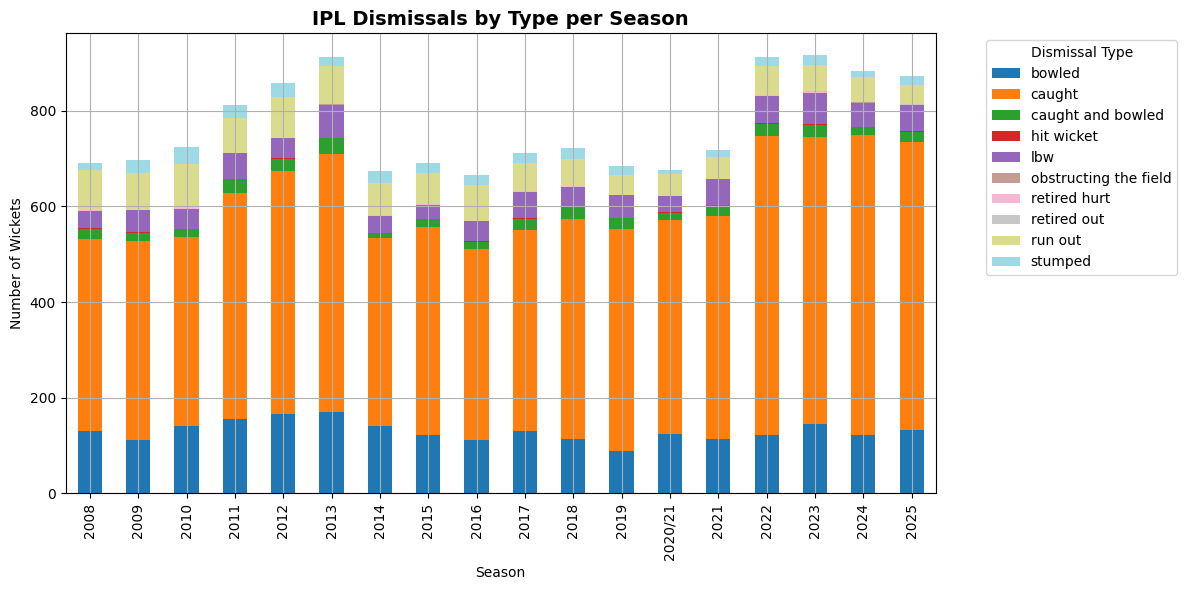

In [25]:
import matplotlib.pyplot as plt

# Filter only dismissal data
dismissals = (
    balls.query("is_wicket == 1 & player_out.notnull()")
    .groupby(["season", "wicket_kind"])["is_wicket"]
    .sum()
    .reset_index(name="count")
)

# Pivot to wide format (wicket kinds as columns)
dismissals_pivot = dismissals.pivot(
    index="season", columns="wicket_kind", values="count"
).fillna(0)

# --- 1. Stacked Bar Chart (Dismissals per Season) ---
dismissals_pivot.plot(
    kind="bar", stacked=True, figsize=(12,6), colormap="tab20"
)

plt.title("IPL Dismissals by Type per Season", fontsize=14, weight="bold")
plt.xlabel("Season")
plt.ylabel("Number of Wickets")
plt.legend(title="Dismissal Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



In [62]:
import pandas as pd

# ✅ Runs per batter per season
batting_stats = (
    balls.groupby(["season", "batter"])
    .agg(
        runs=("batter_runs", "sum"),
        balls_faced=("batter_runs", "count"),
        fours=("batter_runs", lambda x: (x == 4).sum()),
        sixes=("batter_runs", lambda x: (x == 6).sum()),
        dismissals=("player_out", lambda x: x.notnull().sum()),
    )
    .reset_index()
)

# ✅ Calculate Batting Metrics
batting_stats["strike_rate"] = (batting_stats["runs"] / batting_stats["balls_faced"]) * 100
batting_stats["average"] = batting_stats["runs"] / batting_stats["dismissals"].replace(0, pd.NA)

# ✅ Top run scorer per season
orange_cap = (
    batting_stats.sort_values(["season", "runs"], ascending=[True, False])
    .groupby("season")
    .head(1)   # take highest scorer each season
)

# Select relevant columns
orange_cap = orange_cap[["season", "batter", "runs", "fours", "sixes", "strike_rate", "average"]]



# If using Jupyter, prettier display
from IPython.display import display
display(orange_cap.style.format({
    "runs": "{:,.0f}",
    "fours": "{:,.0f}",
    "sixes": "{:,.0f}",
    "strike_rate": "{:.2f}",
    "average": "{:.2f}"
}))


,season,batter,runs,fours,sixes,strike_rate,average
115,2008,SE Marsh,616,59,26,136.28,61.60
229,2009,ML Hayden,572,60,22,139.85,57.20
446,2010,SR Tendulkar,618,86,3,126.38,47.54
502,2011,CH Gayle,608,57,44,177.78,67.56
684,2012,CH Gayle,733,46,59,155.30,61.08
910,2013,MEK Hussey,733,81,17,126.38,48.87
1088,2014,RV Uthappa,660,74,18,136.08,41.25
1148,2015,DA Warner,562,65,21,152.72,46.83
1383,2016,V Kohli,973,84,38,148.55,81.08
1422,2017,DA Warner,641,63,26,138.74,58.27


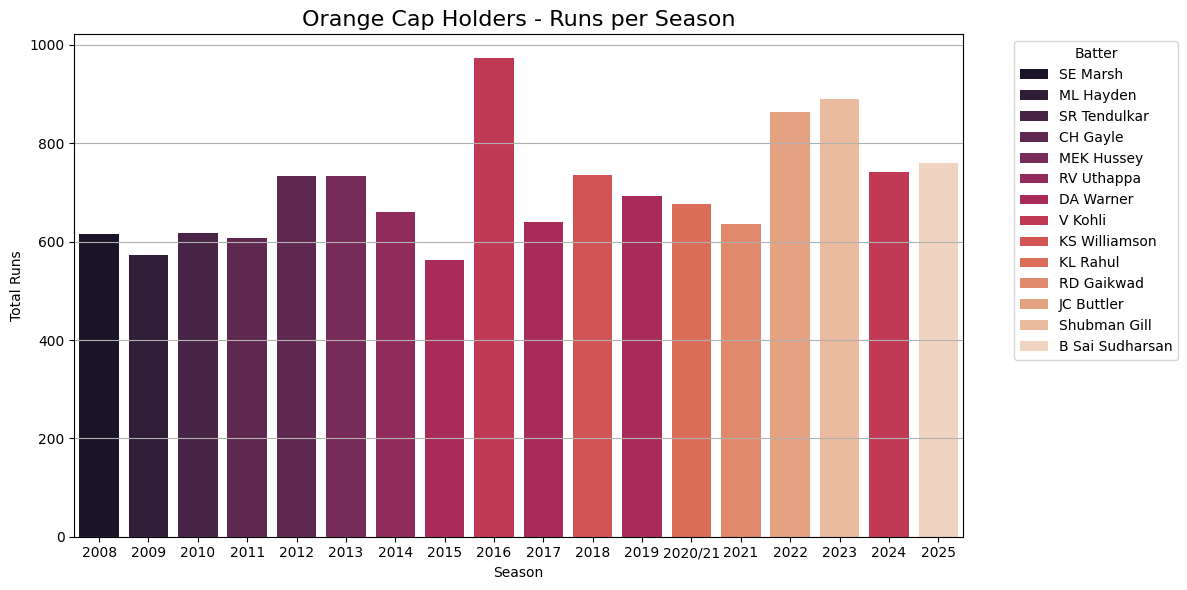

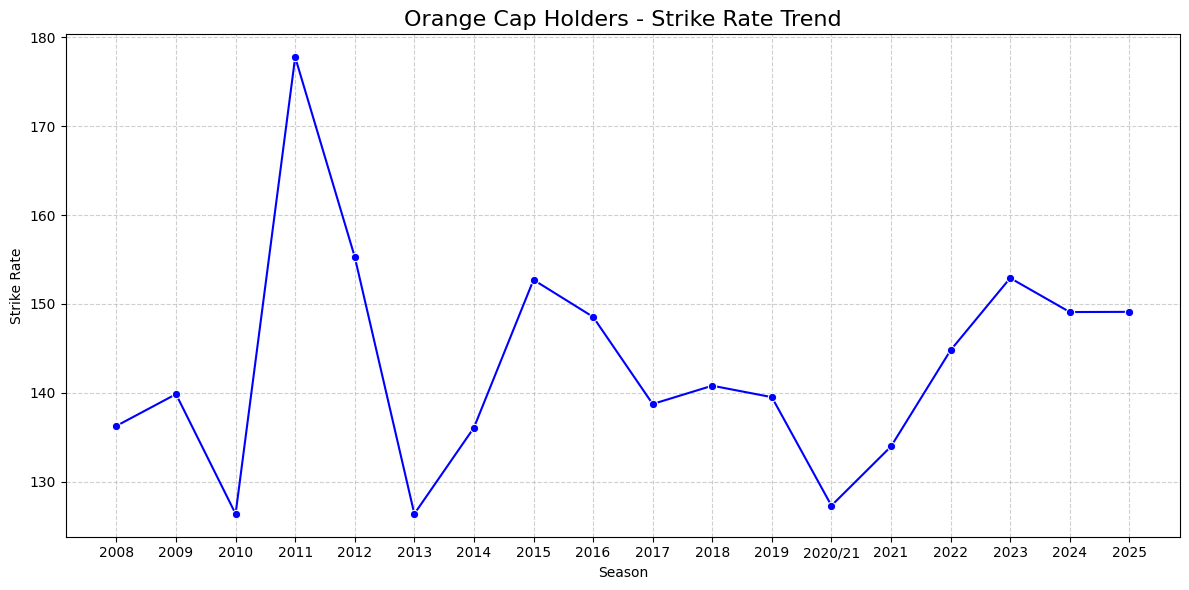

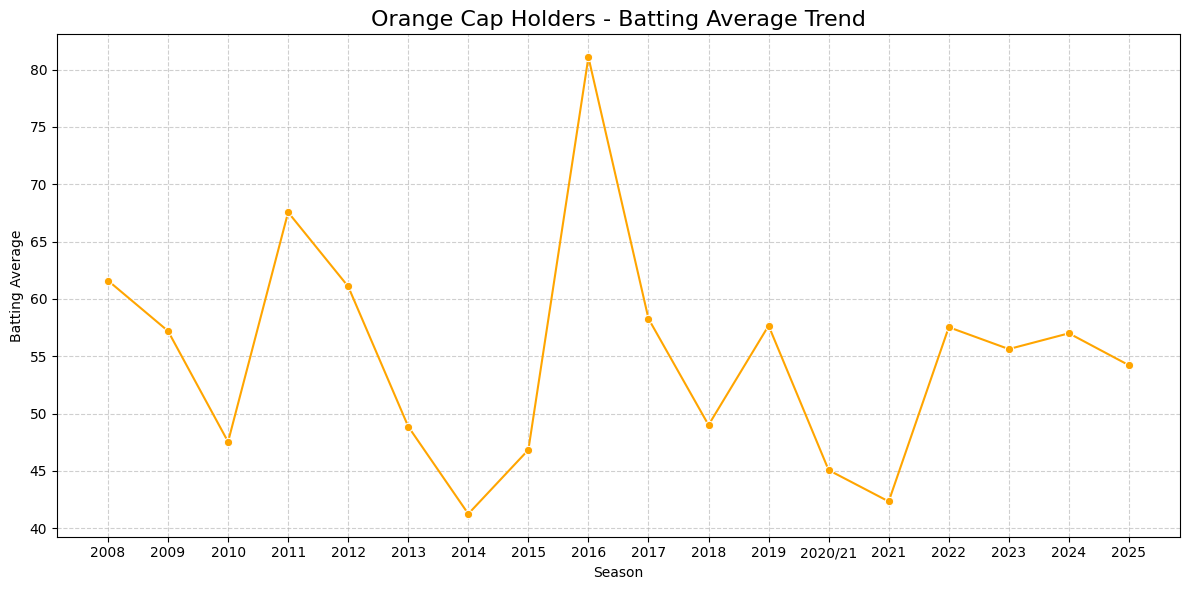

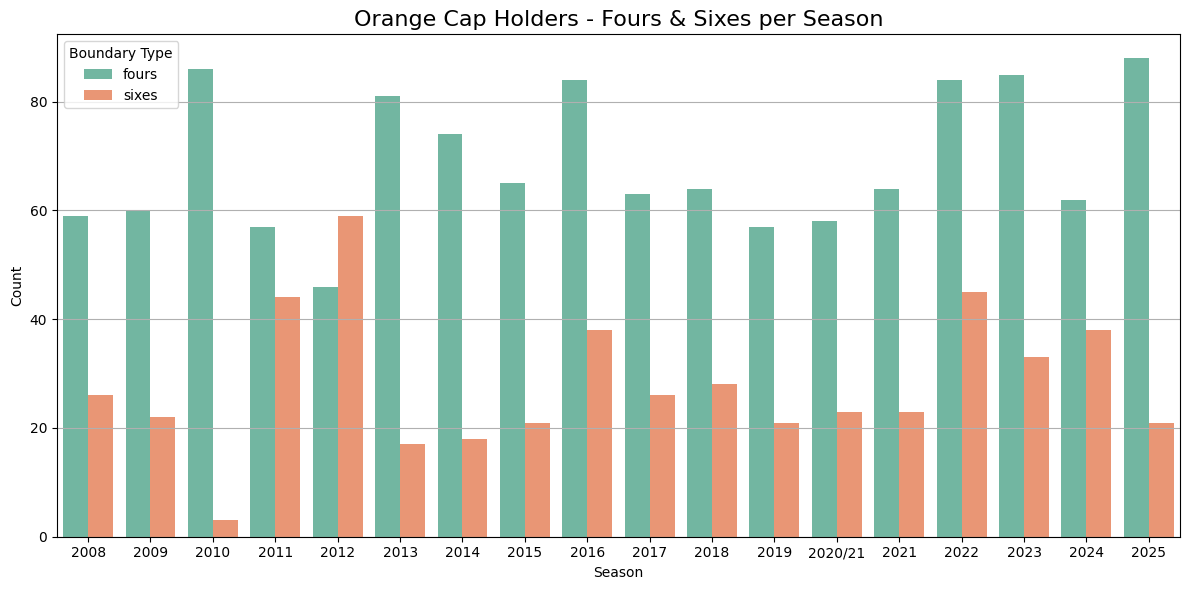

In [78]:
# ---------------- Orange Cap Visualizations ----------------

# 1️⃣ Runs per season (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=orange_cap, x="season", y="runs", hue="batter", dodge=False, palette="rocket")
plt.title("Orange Cap Holders - Runs per Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Total Runs")
plt.legend(title="Batter", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2️⃣ Strike rate trend (line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=orange_cap, x="season", y="strike_rate", marker="o", color="blue")
plt.title("Orange Cap Holders - Strike Rate Trend", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Strike Rate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 3️⃣ Batting average trend (line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=orange_cap, x="season", y="average", marker="o", color="orange")
plt.title("Orange Cap Holders - Batting Average Trend", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Batting Average")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 4️⃣ Fours & Sixes (grouped bar chart)
plt.figure(figsize=(12, 6))
orange_cap_melted = orange_cap.melt(
    id_vars=["season", "batter"], 
    value_vars=["fours", "sixes"], 
    var_name="Boundary_Type", 
    value_name="Count"
)
sns.barplot(data=orange_cap_melted, x="season", y="Count", hue="Boundary_Type", palette="Set2")
plt.title("Orange Cap Holders - Fours & Sixes per Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title="Boundary Type")
plt.tight_layout()
plt.show()


In [74]:
import pandas as pd

# --- Purple Cap Stats (Top Wicket Takers per Season) ---
bowling_stats = (
    balls.groupby(["season", "bowler", "match_id"])
    .agg(
        balls_bowled=("ball_number", "count"),
        overs=("over_number", "nunique"),
        runs_conceded=("total_runs", "sum"),
        wickets=("is_wicket", "sum")
    )
    .reset_index()
)

# ✅ 4W & 5W hauls per bowler per season
four_w = (
    bowling_stats[bowling_stats["wickets"] >= 4]
    .groupby(["season", "bowler"])["match_id"]
    .count()
    .reset_index(name="4W")
)

five_w = (
    bowling_stats[bowling_stats["wickets"] >= 5]
    .groupby(["season", "bowler"])["match_id"]
    .count()
    .reset_index(name="5W")
)

# --- Aggregate season-wise per bowler ---
season_bowling = (
    bowling_stats.groupby(["season", "bowler"])
    .agg(
        balls_bowled=("balls_bowled", "sum"),
        overs=("overs", "sum"),
        runs_conceded=("runs_conceded", "sum"),
        wickets=("wickets", "sum")
    )
    .reset_index()
)

# Merge 4W & 5W
season_bowling = season_bowling.merge(four_w, on=["season", "bowler"], how="left")
season_bowling = season_bowling.merge(five_w, on=["season", "bowler"], how="left")
season_bowling[["4W", "5W"]] = season_bowling[["4W", "5W"]].fillna(0).astype(int)

# ✅ Bowling Metrics
season_bowling["average"] = (
    season_bowling["runs_conceded"] / season_bowling["wickets"].replace(0, pd.NA)
)
season_bowling["strike_rate"] = (
    season_bowling["balls_bowled"] / season_bowling["wickets"].replace(0, pd.NA)
)
season_bowling["economy"] = (
    season_bowling["runs_conceded"] / (season_bowling["overs"].replace(0, 1))
)

# --- Pick top wicket taker per season (Purple Cap) ---
purple_cap = (
    season_bowling.sort_values(["season", "wickets", "average"], ascending=[True, False, True])
    .groupby("season")
    .head(1)
    .reset_index(drop=True)
)

# --- 📊 Final Display ---
purple_cap = purple_cap[[
    "season", "bowler", "wickets", "balls_bowled", "overs",
    "runs_conceded", "average", "strike_rate", "economy", "4W", "5W"
]]

# Round to 2 decimals
purple_cap[["average", "strike_rate", "economy"]] = purple_cap[["average", "strike_rate", "economy"]].round(2)

print("🏆 Purple Cap Holders (per season)")
display(purple_cap)


🏆 Purple Cap Holders (per season)


,season,bowler,wickets,balls_bowled,overs,runs_conceded,average,strike_rate,economy,4W,5W
0,2008,Sohail Tanvir,24,265,42,275,11.458333,11.041667,6.55,2,1
1,2009,RP Singh,26,382,61,430,16.538462,14.692308,7.05,2,1
2,2010,PP Ojha,22,360,59,439,19.954545,16.363636,7.44,0,0
3,2011,SL Malinga,30,397,64,393,13.1,13.233333,6.14,1,1
4,2012,M Morkel,30,389,63,466,15.533333,12.966667,7.40,3,0
5,2013,DJ Bravo,34,392,63,505,14.852941,11.529412,8.02,1,0
6,2014,MM Sharma,26,324,54,457,17.576923,12.461538,8.46,1,1
7,2015,DJ Bravo,28,324,54,442,15.785714,11.571429,8.19,0,0
8,2016,B Kumar,24,414,66,503,20.958333,17.25,7.62,1,0
9,2017,B Kumar,28,324,53,384,13.714286,11.571429,7.25,1,1


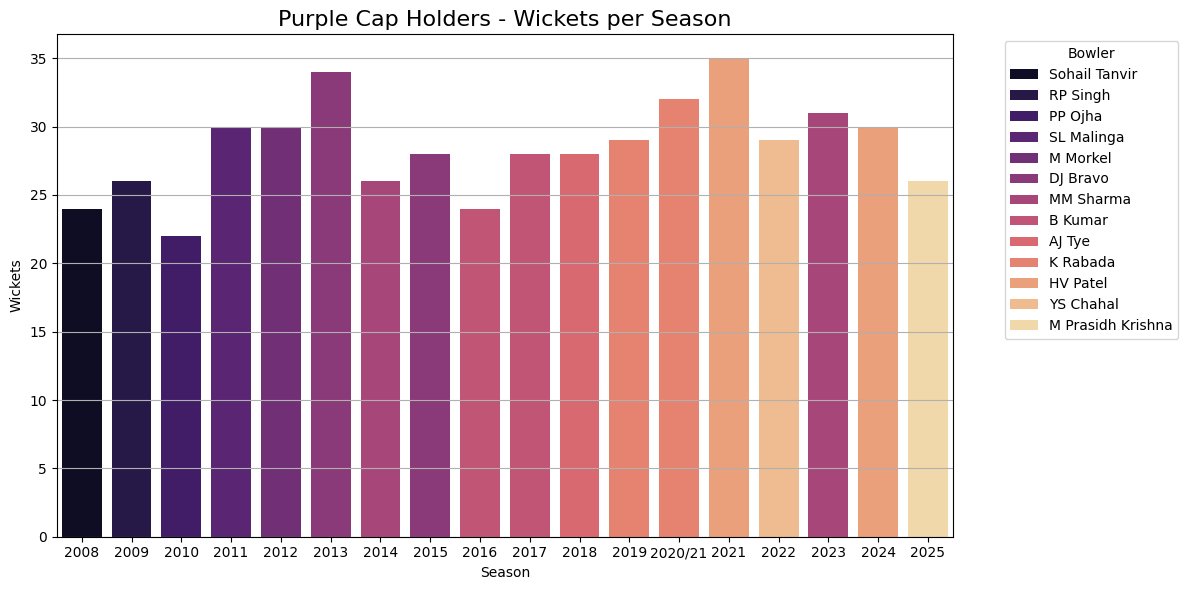

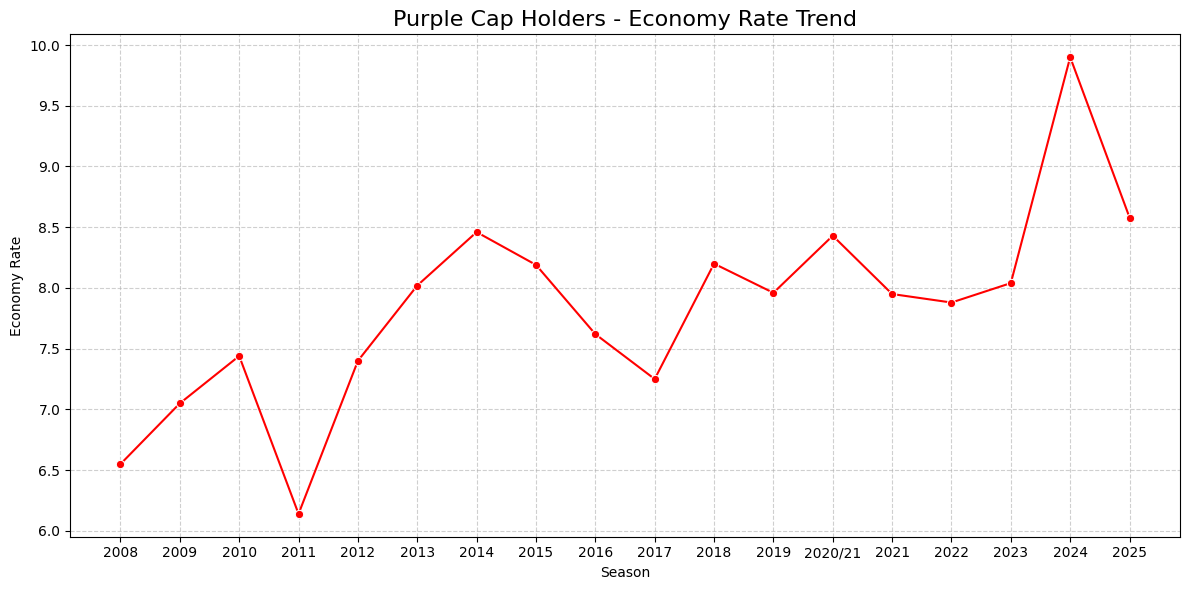

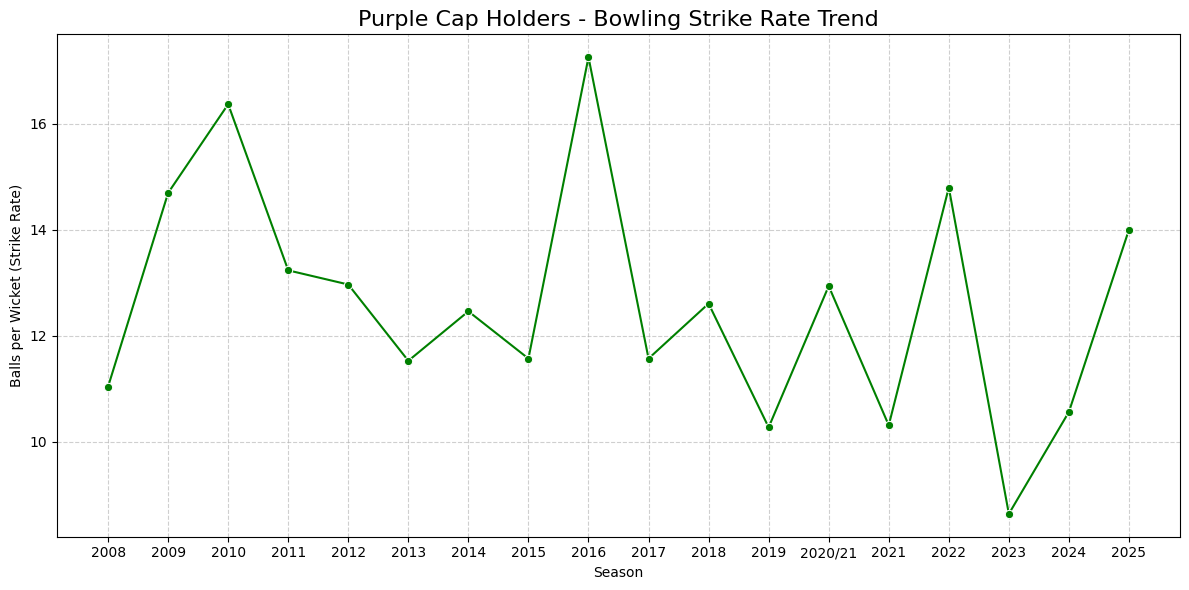

In [76]:
# ---------------- Top 3 Purple Cap Visualizations ----------------

# 1️⃣ Wickets per season (bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=purple_cap, x="season", y="wickets", hue="bowler", dodge=False, palette="magma")
plt.title("Purple Cap Holders - Wickets per Season", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Wickets")
plt.legend(title="Bowler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2️⃣ Economy rate trend (line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=purple_cap, x="season", y="economy", marker="o", color="red")
plt.title("Purple Cap Holders - Economy Rate Trend", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Economy Rate")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 3️⃣ Bowling strike rate trend (line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(data=purple_cap, x="season", y="strike_rate", marker="o", color="green")
plt.title("Purple Cap Holders - Bowling Strike Rate Trend", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Balls per Wicket (Strike Rate)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [82]:
import pandas as pd
from IPython.display import display

# Max run win per season
max_runs_per_season = (
    matches.loc[matches.groupby("season")["win_by_runs"].idxmax(), 
                ["season", "team1", "team2", "match_winner", "win_by_runs"]]
    .reset_index(drop=True)
)

print("🏏 Match Won by Maximum Runs per Season")
display(max_runs_per_season)


🏏 Match Won by Maximum Runs per Season


,season,team1,team2,match_winner,win_by_runs
0,2008,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140.0
1,2009,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,92.0
2,2010,Delhi Capitals,Mumbai Indians,Mumbai Indians,98.0
3,2011,Punjab Kings,Royal Challengers Bangalore,Punjab Kings,111.0
4,2012,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,86.0
5,2013,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130.0
6,2014,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,93.0
7,2015,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,138.0
8,2016,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144.0
9,2017,Delhi Capitals,Mumbai Indians,Mumbai Indians,146.0


In [84]:
# Max wickets win per season
max_wickets_per_season = (
    matches.loc[matches.groupby("season")["win_by_wickets"].idxmax(), 
                ["season", "team1", "team2", "match_winner", "win_by_wickets"]]
    .reset_index(drop=True)
)

print("🏏 Match Won by Maximum Wickets per Season")
display(max_wickets_per_season)


🏏 Match Won by Maximum Wickets per Season


,season,team1,team2,match_winner,win_by_wickets
0,2008,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,10.0
1,2009,Delhi Capitals,Punjab Kings,Delhi Capitals,10.0
2,2010,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,10.0
3,2011,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,10.0
4,2012,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10.0
5,2013,Punjab Kings,Chennai Super Kings,Chennai Super Kings,10.0
6,2014,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,9.0
7,2015,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,10.0
8,2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10.0
9,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,10.0


In [85]:
# Min run win per season
min_runs_per_season = (
    matches[matches["win_by_runs"] > 0]
    .loc[matches[matches["win_by_runs"] > 0].groupby("season")["win_by_runs"].idxmin(),
         ["season", "team1", "team2", "match_winner", "win_by_runs"]]
    .reset_index(drop=True)
)

print("🏏 Match Won by Minimum Runs per Season")
display(min_runs_per_season)


🏏 Match Won by Minimum Runs per Season


,season,team1,team2,match_winner,win_by_runs
0,2008,Mumbai Indians,Punjab Kings,Punjab Kings,1.0
1,2009,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,1.0
2,2010,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,2.0
3,2011,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,2.0
4,2012,Delhi Capitals,Rajasthan Royals,Delhi Capitals,1.0
5,2013,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,2.0
6,2014,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,2.0
7,2015,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,1.0
8,2016,Delhi Capitals,Gujarat Lions,Gujarat Lions,1.0
9,2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,1.0


In [86]:
# Min wickets win per season
min_wickets_per_season = (
    matches[matches["win_by_wickets"] > 0]
    .loc[matches[matches["win_by_wickets"] > 0].groupby("season")["win_by_wickets"].idxmin(),
         ["season", "team1", "team2", "match_winner", "win_by_wickets"]]
    .reset_index(drop=True)
)

print("🏏 Match Won by Minimum Wickets per Season")
display(min_wickets_per_season)


🏏 Match Won by Minimum Wickets per Season


,season,team1,team2,match_winner,win_by_wickets
0,2008,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,3.0
1,2009,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,2.0
2,2010,Mumbai Indians,Punjab Kings,Mumbai Indians,4.0
3,2011,Pune Warriors,Delhi Capitals,Delhi Capitals,3.0
4,2012,Mumbai Indians,Chennai Super Kings,Mumbai Indians,2.0
5,2013,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,3.0
6,2014,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,3.0
7,2015,Kolkata Knight Riders,Punjab Kings,Kolkata Knight Riders,1.0
8,2016,Rising Pune Supergiant,Kolkata Knight Riders,Kolkata Knight Riders,2.0
9,2017,Gujarat Lions,Delhi Capitals,Delhi Capitals,2.0


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load data
BALLS_PATH   = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\ball_by_ball_data.csv"
MATCHES_PATH = r"C:\Users\Hewlett Packard\Downloads\ipl data python analysis\IPL Data\ipl_matches_data.csv"

balls = pd.read_csv(BALLS_PATH)
matches = pd.read_csv(MATCHES_PATH)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


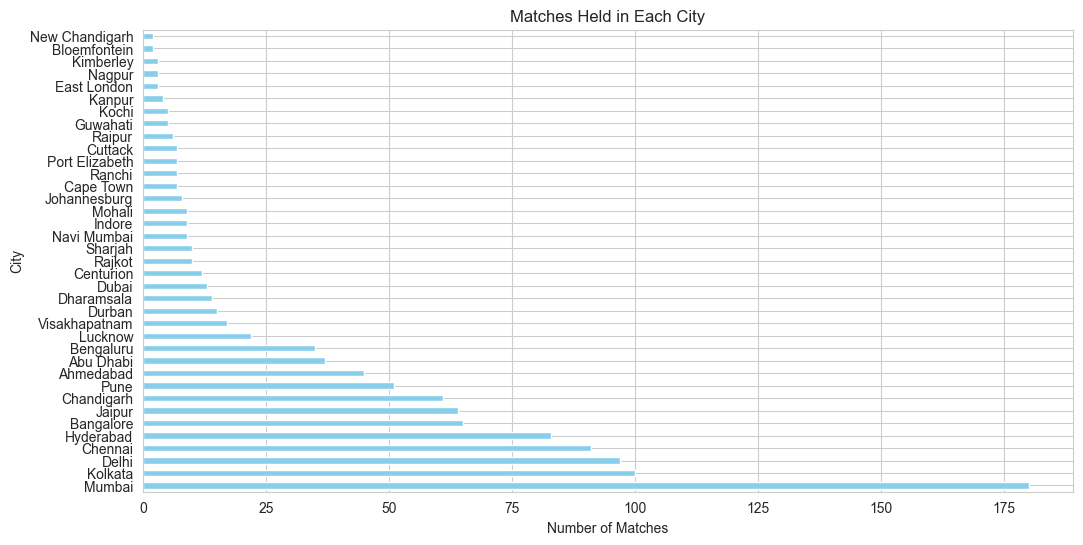

In [91]:
matches_per_city = matches.groupby("city")["match_id"].nunique().sort_values(ascending=False)
matches_per_city.plot(kind="barh", color="skyblue")
plt.title("Matches Held in Each City")
plt.xlabel("Number of Matches")
plt.ylabel("City")
plt.show()


C:\Users\Hewlett Packard\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


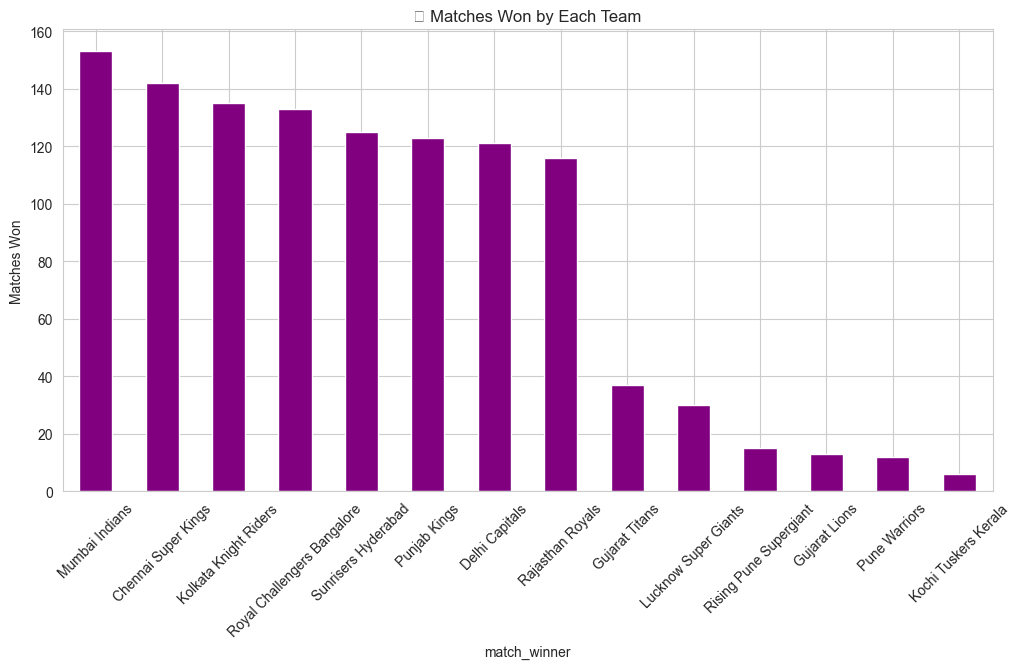

In [92]:
matches_won_team = matches["match_winner"].value_counts()
matches_won_team.plot(kind="bar", color="purple")
plt.title(" Matches Won by Each Team")
plt.ylabel("Matches Won")
plt.xticks(rotation=45)
plt.show()


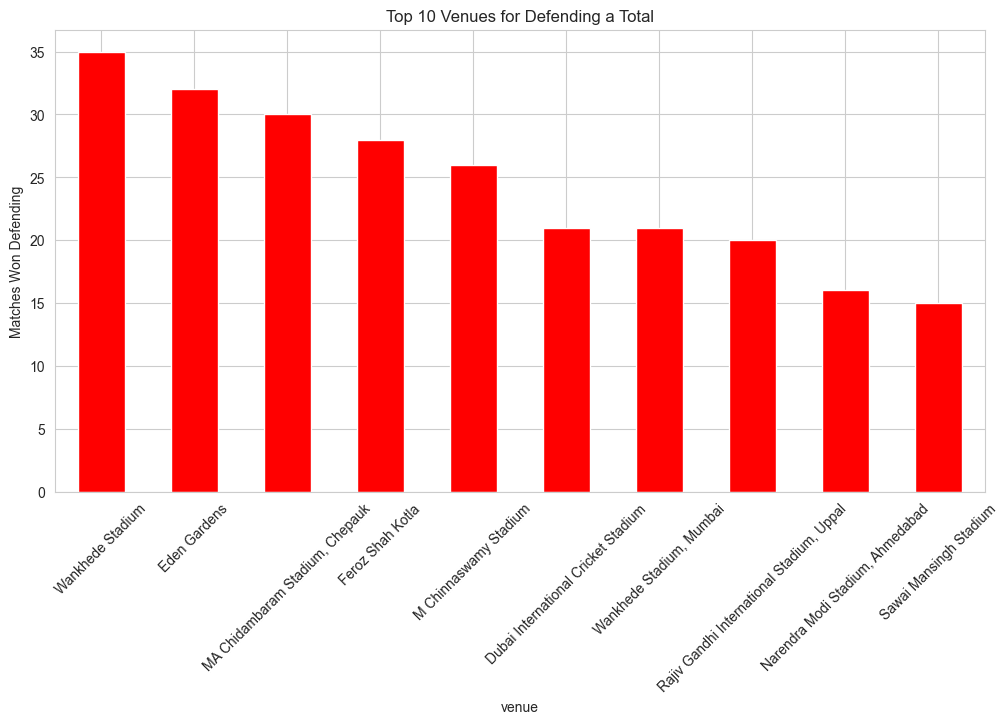

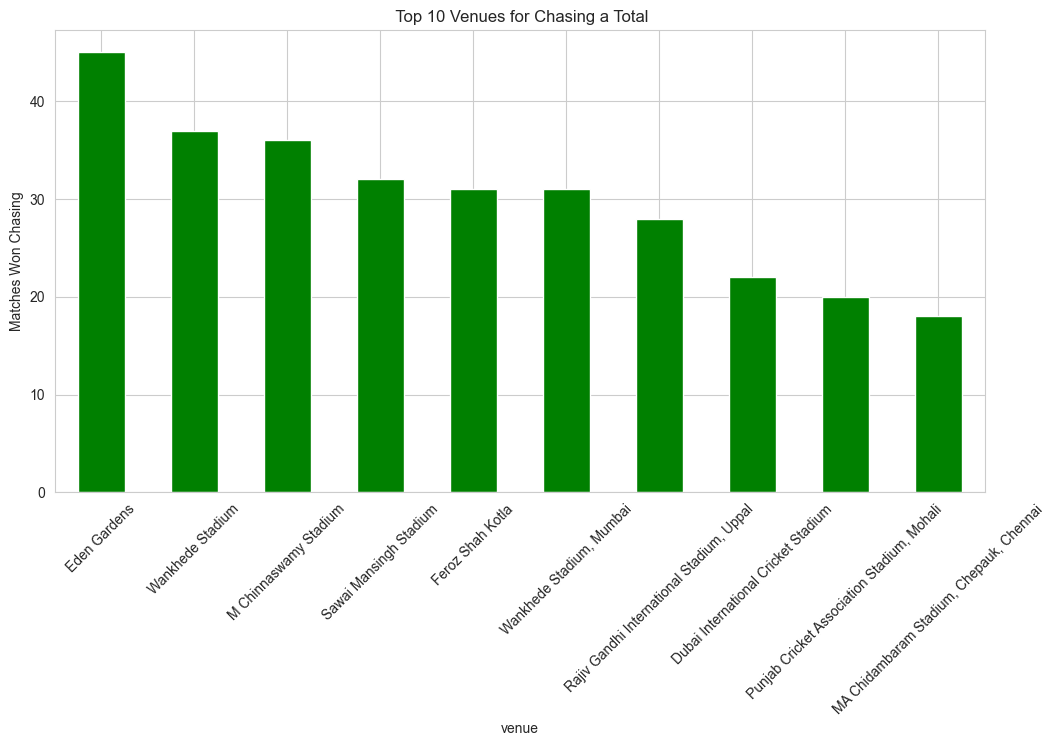

In [98]:
defend_wins = matches[matches["win_by_runs"] > 0].groupby("venue")["match_id"].count().sort_values(ascending=False)
chase_wins = matches[matches["win_by_wickets"] > 0].groupby("venue")["match_id"].count().sort_values(ascending=False)

defend_wins.head(10).plot(kind="bar", color="red")
plt.title("Top 10 Venues for Defending a Total")
plt.ylabel("Matches Won Defending")
plt.xticks(rotation=45)
plt.show()

chase_wins.head(10).plot(kind="bar", color="green")
plt.title(" Top 10 Venues for Chasing a Total")
plt.ylabel("Matches Won Chasing")
plt.xticks(rotation=45)
plt.show()


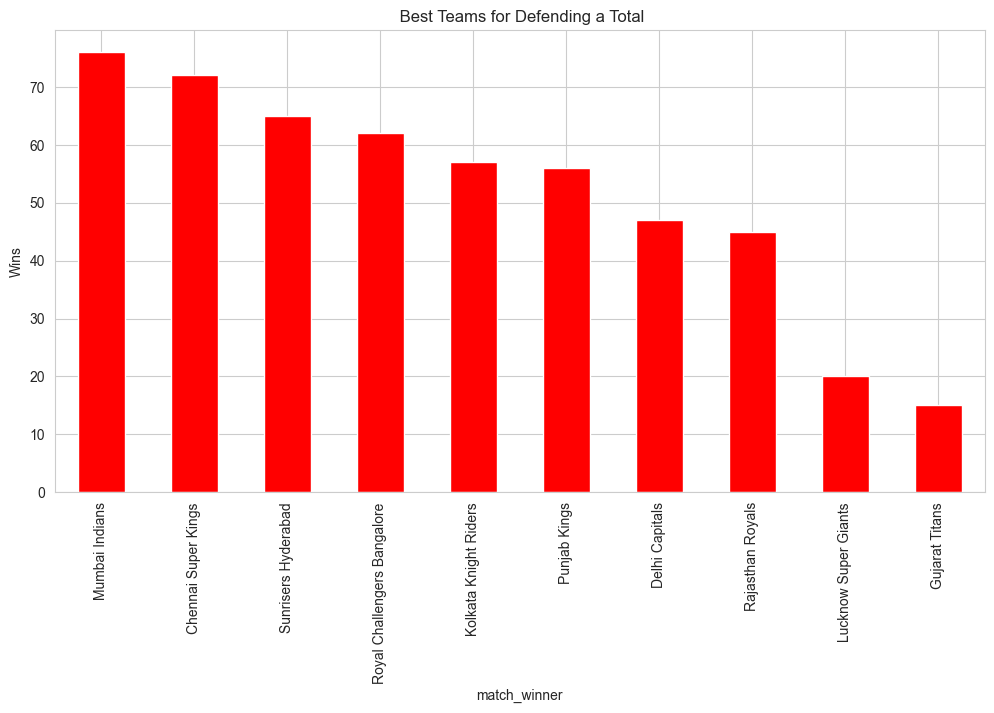

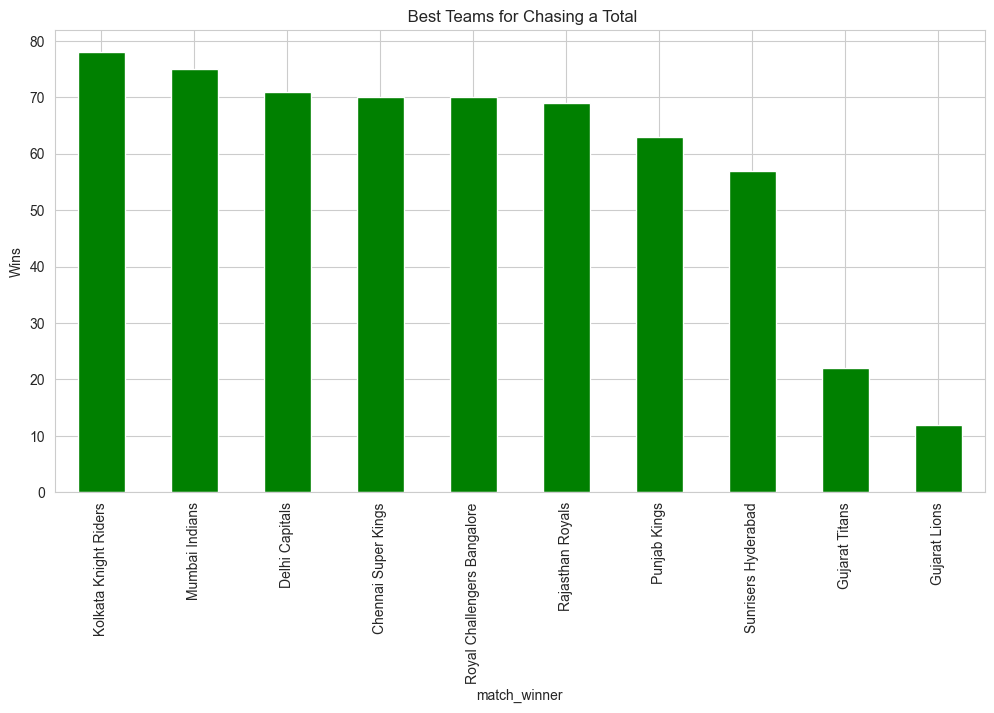

In [99]:
best_defend_team = matches[matches["win_by_runs"]>0]["match_winner"].value_counts()
best_chase_team = matches[matches["win_by_wickets"]>0]["match_winner"].value_counts()

best_defend_team.head(10).plot(kind="bar", color="red")
plt.title(" Best Teams for Defending a Total")
plt.ylabel("Wins")
plt.show()

best_chase_team.head(10).plot(kind="bar", color="green")
plt.title(" Best Teams for Chasing a Total")
plt.ylabel("Wins")
plt.show()


C:\Users\Hewlett Packard\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127967 (\N{STADIUM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Hewlett Packard\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


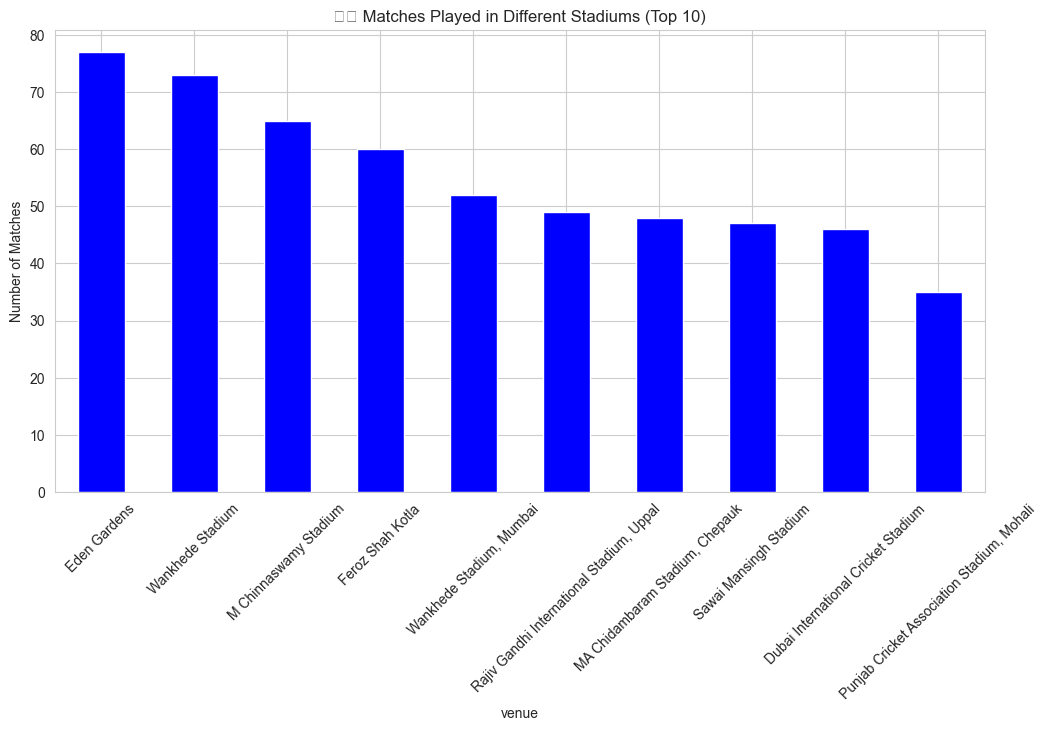

In [100]:
matches_per_venue = matches["venue"].value_counts()
matches_per_venue.head(10).plot(kind="bar", color="blue")
plt.title("Matches Played in Different Stadiums (Top 10)")
plt.ylabel("Number of Matches")
plt.xticks(rotation=45)
plt.show()
